In [1]:
import random

X = [i // 3 + 1 for i in range(30)]
y = [x + random.random() for x in X[:15]] + [x * 2 + random.random() for x in X[15:]]

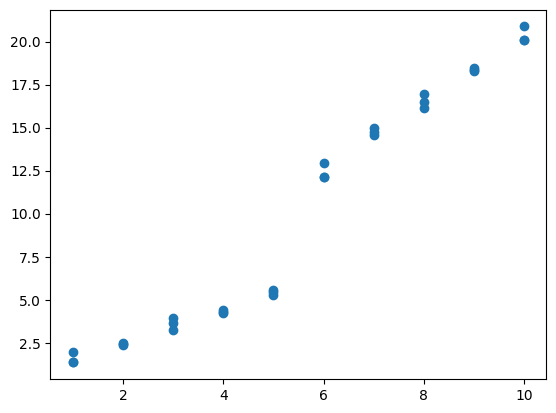

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [3]:
X_dict = [{"X": x} for x in X]

for X_i, y_i in zip(X_dict, y):
    print(X_i, y_i)

{'X': 1} 1.3700955852546408
{'X': 1} 1.9722006206590308
{'X': 1} 1.3553430620848401
{'X': 2} 2.4319812141055466
{'X': 2} 2.504194459203699
{'X': 2} 2.364440114694856
{'X': 3} 3.67484136326283
{'X': 3} 3.2270975201576477
{'X': 3} 3.9120762113301186
{'X': 4} 4.208660248328215
{'X': 4} 4.30052134743974
{'X': 4} 4.397583259266947
{'X': 5} 5.590872466167539
{'X': 5} 5.250966520349211
{'X': 5} 5.421355396967214
{'X': 6} 12.121460509519018
{'X': 6} 12.957329633375725
{'X': 6} 12.140717090491645
{'X': 7} 14.978220072686113
{'X': 7} 14.559708722983414
{'X': 7} 14.75317347406126
{'X': 8} 16.47571707211096
{'X': 8} 16.109611291807884
{'X': 8} 16.97985461230376
{'X': 9} 18.291870321394303
{'X': 9} 18.349199772261297
{'X': 9} 18.434313025825396
{'X': 10} 20.09489094856659
{'X': 10} 20.061569346133346
{'X': 10} 20.87400196797611


In [4]:
from river.neighbors import KNNRegressor

my_knn = KNNRegressor(n_neighbors=3)

X_dict = [{"X": x} for x in X]

for X_i, y_i in zip(X_dict, y):
    my_knn.learn_one(X_i, y_i)

In [5]:
preds = []
for X_i in X_dict:
    preds.append(my_knn.predict_one(X_i))

sum_absolute_error = 0
for pred, real in zip(preds, y):
    sum_absolute_error += abs(pred - real)

mean_absolute_error = sum_absolute_error / len(preds)
print(mean_absolute_error)

0.18709764900393436


In [6]:
my_knn = KNNRegressor(n_neighbors=3)

X_dict = [{"X": x} for x in X]

step_by_step_error = []
for i in range(len(X_dict)):
    my_knn.learn_one(X_dict[i], y[i])
    abs_error = abs(my_knn.predict_one(X_dict[i]) - y[i])
    step_by_step_error.append(abs_error)

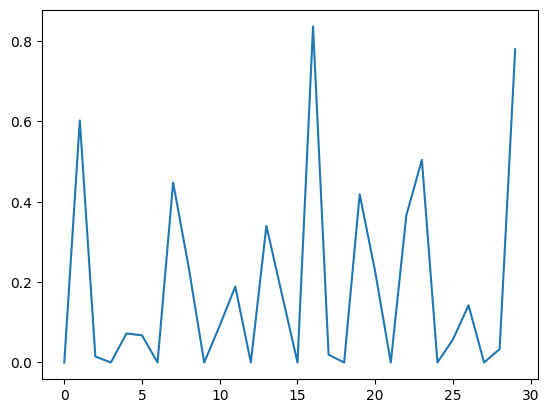

In [7]:
plt.plot(step_by_step_error)

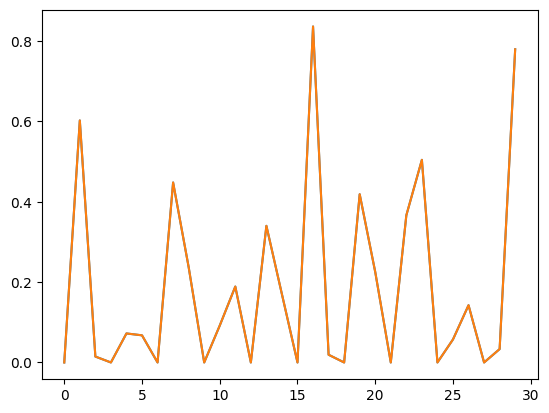

In [8]:
preds = []
for X_i in X_dict:
    preds.append(my_knn.predict_one(X_i))

all_errors = []
for pred, real in zip(preds, y):
    all_errors.append(abs(pred - real))

plt.plot(step_by_step_error)
plt.plot(all_errors)
plt.show()

In [9]:
my_knn = KNNRegressor(n_neighbors=3)

X_dict = [{"X": x} for x in X]

step_by_step_error = []

for i in range(len(X_dict)):
    my_knn.learn_one(X_dict[i], y[i])
    abs_error = abs(my_knn.predict_one(X_dict[i]) - y[i])
    step_by_step_error.append(abs_error)

    all_errors_recomputed = []
    for j in range(i):
        orig_error = step_by_step_error[j]
        after_error = abs(my_knn.predict_one(X_dict[j]) - y[j])
        if after_error > orig_error:
            print(f"At learning step {i}, data point {j} was partly forgotten")

In [10]:
import pandas as pd

ice_cream_sales = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
degrees_celsius = [30, 25, 20, 19, 18, 17, 15, 13, 10, 5]
price = [2, 2, 3, 3, 4, 4, 5, 5, 6, 6]

data = pd.DataFrame(
    {
        "ice_cream_sales": ice_cream_sales,
        "degrees_celsius": degrees_celsius,
        "price": price,
    }
)

data

,ice_cream_sales,degrees_celsius,price
0,10,30,2
1,9,25,2
2,8,20,3
3,7,19,3
4,6,18,4
5,5,17,4
6,4,15,5
7,3,13,5
8,2,10,6
9,1,5,6


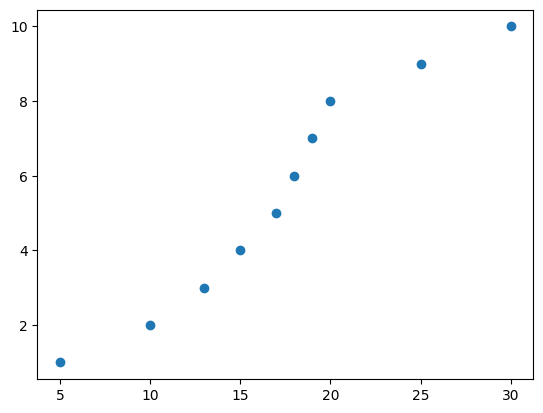

In [11]:
plt.scatter(data["degrees_celsius"], data["ice_cream_sales"])

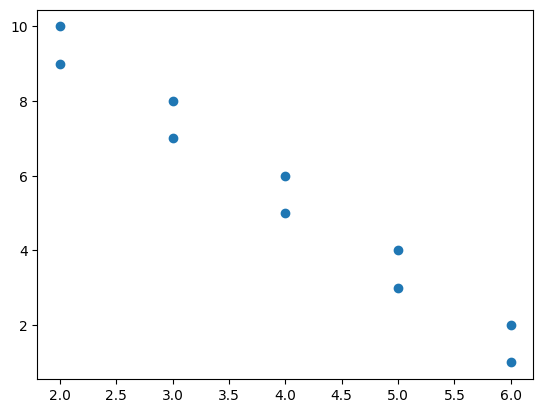

In [12]:
plt.scatter(data["price"], data["ice_cream_sales"])

In [13]:
from sklearn.linear_model import LinearRegression

my_lr = LinearRegression()
my_lr.fit(X=data[["degrees_celsius", "price"]], y=data["ice_cream_sales"])

LinearRegression()

In [14]:
from sklearn.metrics import r2_score

r2_score(data["ice_cream_sales"], my_lr.predict(data[["degrees_celsius", "price"]]))

0.9827362538668796

In [15]:
pd.DataFrame({"variable": ["degrees_celsius", "price"], "coefficient": my_lr.coef_})

,variable,coefficient
0,degrees_celsius,0.153677
1,price,-1.300768


In [16]:
from sklearn.tree import DecisionTreeRegressor

my_dt = DecisionTreeRegressor()
my_dt.fit(X=data[["degrees_celsius", "price"]], y=data["ice_cream_sales"])

DecisionTreeRegressor()

In [17]:
r2_score(data["ice_cream_sales"], my_dt.predict(data[["degrees_celsius", "price"]]))

1.0

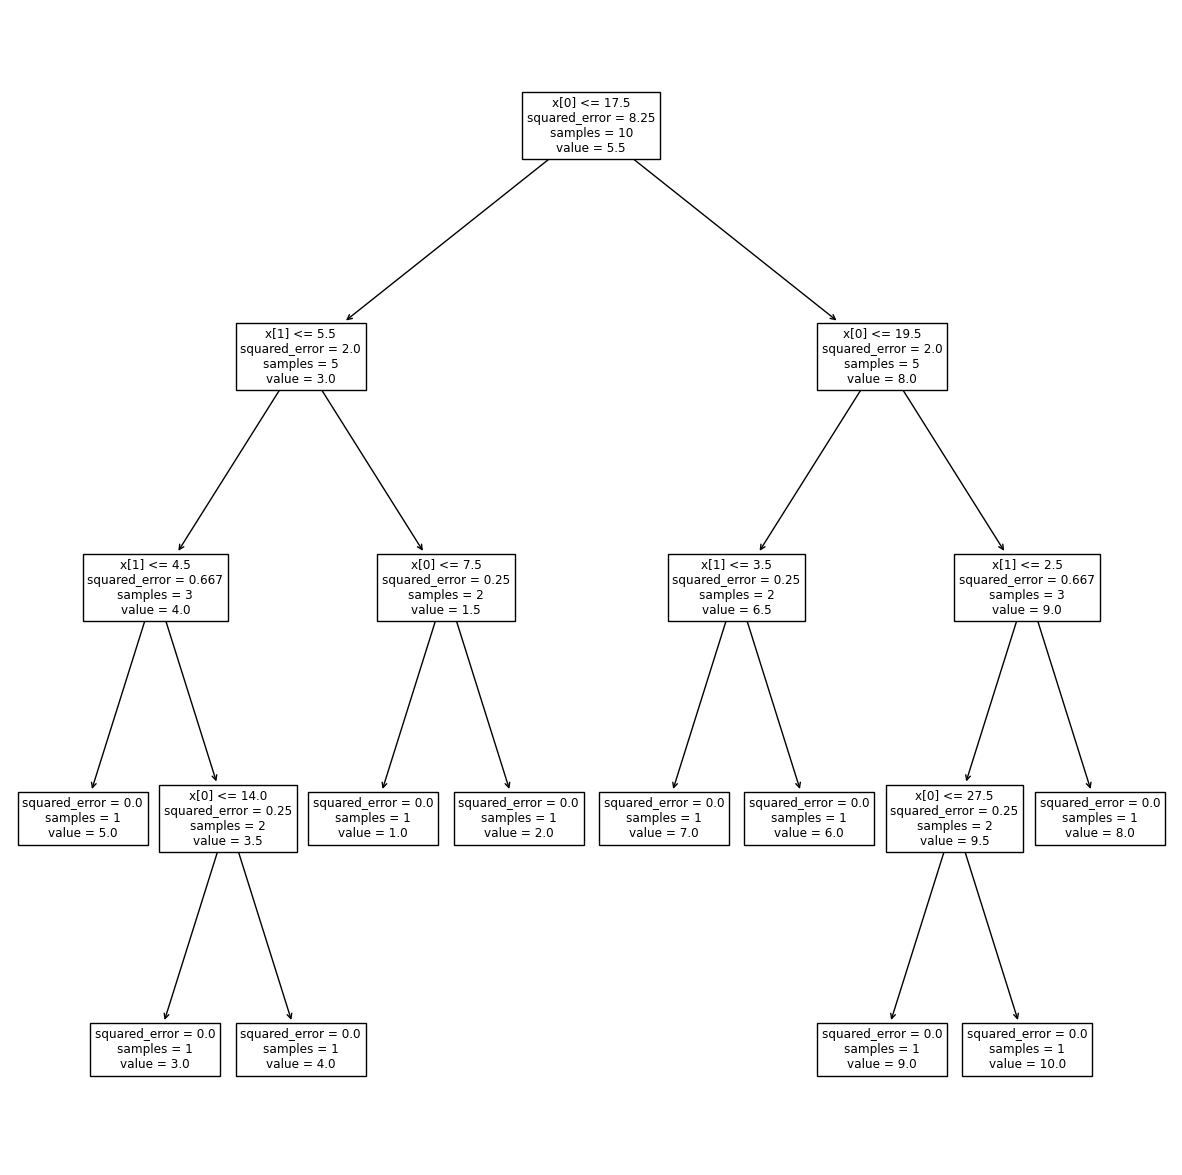

In [18]:
import sklearn

plt.figure(figsize=(15, 15))
sklearn.tree.plot_tree(my_dt)
plt.show()

In [19]:
pd.DataFrame(
    {"variable": ["degrees_celsius", "price"], "importance": my_dt.feature_importances_}
)

,variable,importance
0,degrees_celsius,0.866667
1,price,0.133333
